In [16]:
import websocket
import json
from binance import Client
from binance import BinanceSocketManager
import sqlalchemy
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from math import floor
from pykalman import KalmanFilter
from __future__ import print_function

In [7]:
"""
1m
3m
5m
15m
30m
1h
2h
4h
6h
8h
12h
1d
3d
1w
1M
"""

'\n1m\n3m\n5m\n15m\n30m\n1h\n2h\n4h\n6h\n8h\n12h\n1d\n3d\n1w\n1M\n'

In [2]:
symbol_list = ['BTCUSDT', 'ETHUSDT', 'BUSDUSDT', 'SOLUSDT', 'AVAXUSDT', 'ADAUSDT', 'DOTUSDT', 'XRPUSDT', 'ATOMUSDT', 'BNBUSDT',
              'FTMUSDT', 'FILUSDT', 'LUNAUSDT', 'DOGEUSDT', 'OMGUSDT', 'NEARUSDT', 'TROYUSDT', 'LINKUSDT', 'USDCUSDT', 
               'MATICUSDT', 'SHIBUSDT', 'EOSUSDT', 'TRXUSDT', 'FTTUSDT', 'CELOUSDT', 'LTCUSDT', 'XTZUSDT', 'DYDXUSDT',
              'THETAUSDT', 'VETUSDT', 'CAKEUSDT', 'ALGOUSDT', 'EGLDUSDT']
data_list = []
data = None
start_date = "1 Jan, 2021"
end_date = "1 Sep, 2021"
interval = '1h'
critial_level = 0.05

In [3]:
client = Client('92uhvmwVYvipVDjSBxKrKqZ5jnQSWY7c5N1k3SqACpJh4Nb75VWfkMKVPYUVzA2L',
                'lODSW9XxUqHVBHZPD7H0oMqrQY0GS06UQUZZjnMfTqc1n6RaDpxfvSEis16YLZ1C')

In [5]:
def get_data(symbol, interval, start_date, end_date):
    data = client.get_historical_klines(symbol, interval, start_date, end_date)
    df = pd.DataFrame(data)
    df = df.iloc[:,[0,4]]
    df.columns = ['Datetime', symbol]
    df = df.astype(float)
    df.Datetime = pd.to_datetime(df.Datetime, unit = 'ms')
    df = df.set_index('Datetime')
    return df

In [5]:
for s1 in symbol_list:
    for s2 in symbol_list[symbol_list.index(s1)+1:]:
        try:
            data1 = get_data(s1, interval, start_date, end_date)
            data2 = get_data(s2, interval, start_date, end_date)
            data = pd.merge_ordered(data1, data2, on='Datetime').dropna().set_index('Datetime')
            result = sm.tsa.stattools.coint(data.loc[:,s1], data.loc[:,s2])
            pvalue = result[1]
            if pvalue < critial_level:
                print('{} and {} has a co-integration score of {}'.format(s1, s2, pvalue))
        except:
            print('{} or {} has an Error'.format(s1, s2))
            pass

BTCUSDT and NEARUSDT has a co-integration score of 0.013711653792108838
BTCUSDT or DYDXUSDT has an Error
ETHUSDT or DYDXUSDT has an Error
BUSDUSDT and SOLUSDT has a co-integration score of 5.5343163610507084e-11
BUSDUSDT and AVAXUSDT has a co-integration score of 5.539764406979285e-11
BUSDUSDT and ADAUSDT has a co-integration score of 4.8202952183213924e-11
BUSDUSDT and DOTUSDT has a co-integration score of 5.276874839980118e-11
BUSDUSDT and XRPUSDT has a co-integration score of 3.4406560292200574e-11
BUSDUSDT and ATOMUSDT has a co-integration score of 5.4098991801737324e-11
BUSDUSDT and BNBUSDT has a co-integration score of 5.588934947022956e-11
BUSDUSDT and FTMUSDT has a co-integration score of 5.4650575485607574e-11
BUSDUSDT and FILUSDT has a co-integration score of 5.5377917186891514e-11
BUSDUSDT and LUNAUSDT has a co-integration score of 4.3925775387953104e-11
BUSDUSDT and DOGEUSDT has a co-integration score of 2.0472312594546817e-11
BUSDUSDT and OMGUSDT has a co-integration score

--------------------------------------------TEST CAC CACH KIEM TRA DONG LIEN KET---------------------------------------------------

In [3]:
def get_data(symbol, interval, start_date, end_date):
    data = client.get_historical_klines(symbol, interval, start_date, end_date)
    df = pd.DataFrame(data)
    df = df.iloc[:,[0,4]]
    df.columns = ['Datetime', symbol]
    df = df.astype(float)
    df.Datetime = pd.to_datetime(df.Datetime, unit = 'ms')
    df = df.set_index('Datetime')
    return df

In [4]:
symbol_list = ['ATOMUSDT', 'NEARUSDT']
start_date = "1 Jan, 2021"
end_date = "1 Sep, 2021"
interval = '1h'

client = Client('92uhvmwVYvipVDjSBxKrKqZ5jnQSWY7c5N1k3SqACpJh4Nb75VWfkMKVPYUVzA2L',
                'lODSW9XxUqHVBHZPD7H0oMqrQY0GS06UQUZZjnMfTqc1n6RaDpxfvSEis16YLZ1C')

a = get_data(symbol_list[0], interval, start_date, end_date)
b = get_data(symbol_list[1], interval, start_date, end_date)
#c = np.log(pd.merge_ordered(a, b, on='Datetime').dropna().set_index('Datetime')) #chuyen sang log price
c = pd.merge_ordered(a, b, on='Datetime').dropna().set_index('Datetime') #raw price

In [5]:
c

,ATOMUSDT,NEARUSDT
Datetime,,
2021-01-01 00:00:00,6.401,1.4517
2021-01-01 01:00:00,6.318,1.4765
2021-01-01 02:00:00,6.378,1.4873
2021-01-01 03:00:00,6.185,1.4450
2021-01-01 04:00:00,6.087,1.4468
...,...,...
2021-08-31 20:00:00,22.810,5.2580
2021-08-31 21:00:00,22.600,5.2480
2021-08-31 22:00:00,22.500,5.1960


In [6]:
#Engle-Granger two-step
result = sm.tsa.stattools.coint(c.loc[:,symbol_list[0]], c.loc[:,symbol_list[1]])
p_value = result[1]
print(p_value)

0.03960132346813271


In [7]:
#Johansen Test
jh_results = coint_johansen(c, 0, 1)
print('Trace_stat:\n{}'.format(jh_results.trace_stat))
print('Crit_vals:\n{}'.format(jh_results.trace_stat_crit_vals))
print('Evec:\n{}'.format(jh_results.evec))

Trace_stat:
[18.56963042  4.07399096]
Crit_vals:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Evec:
[[ 0.37151306  0.04898865]
 [-1.25953756  0.47139752]]


In [26]:
jh_results.evec[0][0]/jh_results.evec[1][0]

-0.2949598928615978

In [27]:
jh_results.evec[1][0]/jh_results.evec[0][0]

-3.3902914402983724

In [30]:
jh_results.evec[0][1]/jh_results.evec[1][1]

0.10392215510233917

In [31]:
jh_results.evec[1][1]/jh_results.evec[0][1]

9.622587204963489

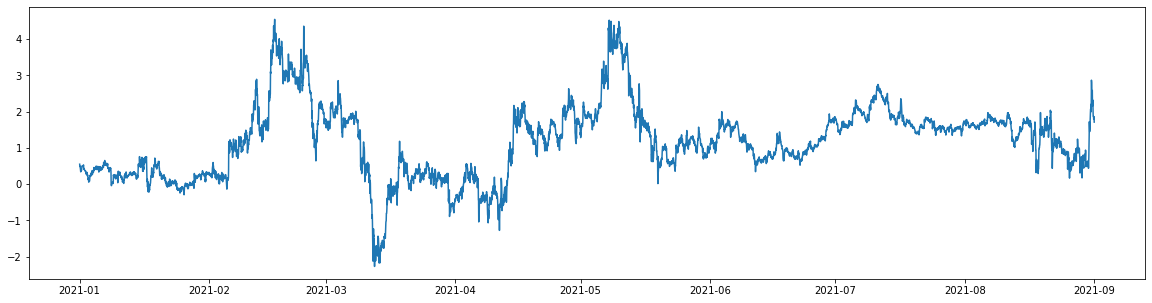

In [9]:
c['e'] = jh_results.evec[0][0]*c[symbol_list[0]] + jh_results.evec[1][0]*c[symbol_list[1]]
plt.figure(figsize=(20,5))
plt.plot(c['e'])

In [28]:
#CADF test 1
lm_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lm_model.fit(c[symbol_list[0]].values.reshape(-1,1), c[symbol_list[1]].values)        # fit() expects 2D array
print('intercept:{}, coef: {}'.format(lm_model.intercept_, lm_model.coef_))
yfit = lm_model.coef_ * c[symbol_list[0]] + lm_model.intercept_
y_residual = c[symbol_list[1]] - yfit
ts.adfuller(y_residual, 1)

intercept:-0.1523300221879338, coef: [0.24585727]


(-3.634874041284389,
 0.005128263830350717,
 1,
 5820,
 {'1%': -3.4314740870339353,
  '5%': -2.8620367403219062,
  '10%': -2.5670344128257816},
 -13375.057779019931)

In [29]:
#CADF test 2
lm_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lm_model.fit(c[symbol_list[1]].values.reshape(-1,1), c[symbol_list[0]].values)        # fit() expects 2D array
print('intercept:{}, coef: {}'.format(lm_model.intercept_, lm_model.coef_))
yfit = lm_model.coef_ * c[symbol_list[1]] + lm_model.intercept_
y_residual = c[symbol_list[0]] - yfit
ts.adfuller(y_residual, 1)

intercept:3.9913661778262917, coef: [3.16767668]


(-3.7799777530152863,
 0.0031189418435853206,
 1,
 5820,
 {'1%': -3.4314740870339353,
  '5%': -2.8620367403219062,
  '10%': -2.5670344128257816},
 1793.9764307154674)

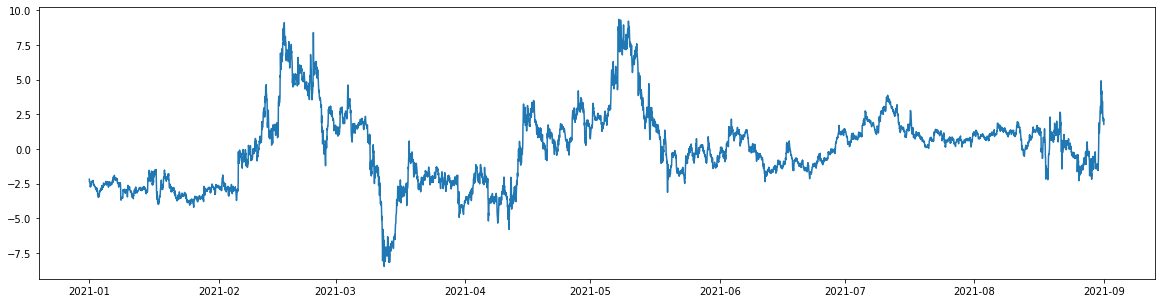

In [15]:
c['e'] = c[symbol_list[0]] - lm_model.coef_*c[symbol_list[1]] - lm_model.intercept_
plt.figure(figsize=(20,5))
plt.plot(c['e'])

In [8]:
#Ham tinh half life
def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    
    spread_lag2 = sm.add_constant(spread_lag)
     
    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))
 
    if halflife <= 0:
        halflife = 1
    return halflife

In [10]:
half_life(c['e'])

120

In [51]:
"""
CADF test 2 co ket qua la -4.471433447253425 < -4.08813144859528 cua CADF test 2
lm_model 1 => BTCUSDT la bien phu thuoc, 
NEARUSDT la bien doc lap

CADF test 2 co coef = 0.62419587 ~ -4.28264417/6.86484636 = -0.6238514234771162 tai johansen test
"""

'\nCADF test 2 co ket qua la -4.471433447253425 < -4.08813144859528 cua CADF test 2\nlm_model 1 => BTCUSDT la bien phu thuoc, \nNEARUSDT la bien doc lap\n\nCADF test 2 co coef = 0.62419587 ~ -4.28264417/6.86484636 = -0.6238514234771162 tai johansen test\n'

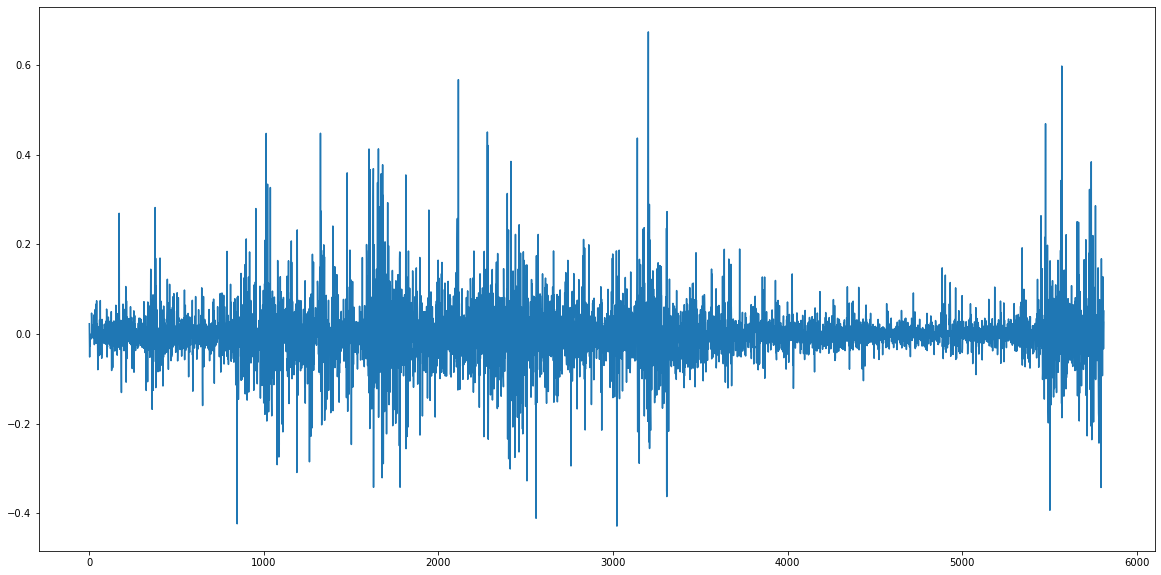

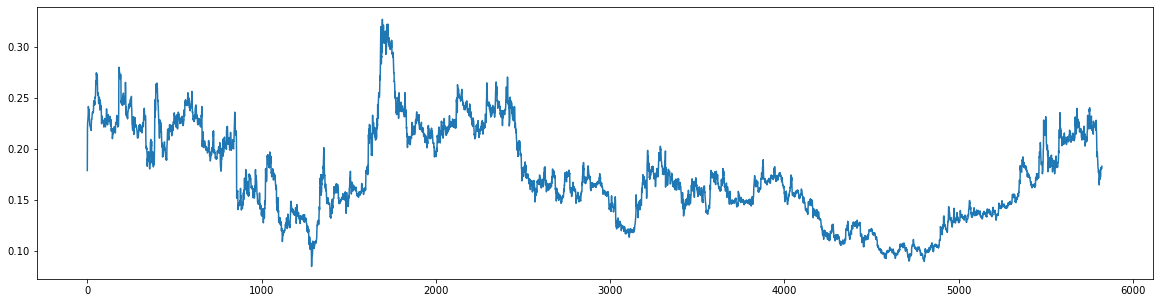

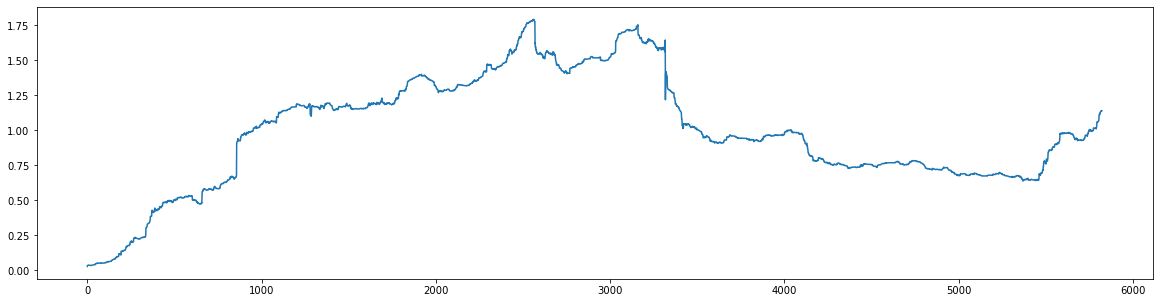

In [12]:
#Medium
class MyKalmanFilter:
    
    def __init__(self, delta=1e-4, R=1e-3):
        # measurement noise variance
        self.R = R

        # co-variance of process noise(2 dimensions)
        self.Q = delta / (1-delta) * np.eye(2) #Tao ma tran 2*2 voi 1 o duong cheo, sau do nhan ma tran nay voi delta/(1-delta) 

        # state (slope, intercept) will be (2 x n), we will initialize with just one column at first
        self.x = np.zeros((2, 1)) #Tao ma tran rong 2*1 (se thay doi theo thoi gian) 

        # state covariance
        self.P = np.zeros((2,2)) #Tao ma tran rong 2*2 (se thay doi theo thoi gian)    

    def step_forward(self, y1, y2): #y1, y2 lan luot la gia tri tung hang cua cot EWC va EWA
        # Before entering the equations, let's define H as (1, 2) matrix
        H = np.array([y2, 1])[None] #Tao mot array kieu [[y2, 1]]
        # and define z
        z = y1

        ## TIME UPDATE ##
        # first thing is to predict new state as the previous one (2x1)
        x_hat = self.x[:, -1][..., None]

        # then, the uncertainty or covariance prediction 
        P_hat = self.P + self.Q

        ## MEASUREMENT UPDATE ##
        # calc the Kalman gain
        K = P_hat.dot(H.T)/(H.dot(P_hat.dot(H.T))+self.R)

        # state update part 1 (measurement estimation)
        z_hat = H.dot(x_hat)
        # state update part 2
        x = x_hat + K.dot(z-z_hat)

        # uncertainty update
        self.P = (np.eye(2)-K.dot(H)).dot(P_hat)

        # append the new state to the vector
        self.x = np.concatenate([self.x, x], axis=1)

        return x, self.P, K, z_hat

mkf = MyKalmanFilter(delta=1e-4, R=1e-3)
series = []
for idx, row in c.iterrows():
    x, P, K, z_hat = mkf.step_forward(row[symbol_list[1]], row[symbol_list[0]])
    series.append(row[symbol_list[1]] - z_hat.squeeze())

# Plot the combined portfolio
plt.figure(figsize=(20,10))
plt.plot(series[10:])

# Plot the hedge ratio over time
plt.figure(figsize=(20,5))
plt.plot(mkf.x[0, 1:])

# Plot the intercept over time
plt.figure(figsize=(20,5))
plt.plot(mkf.x[1, 1:])

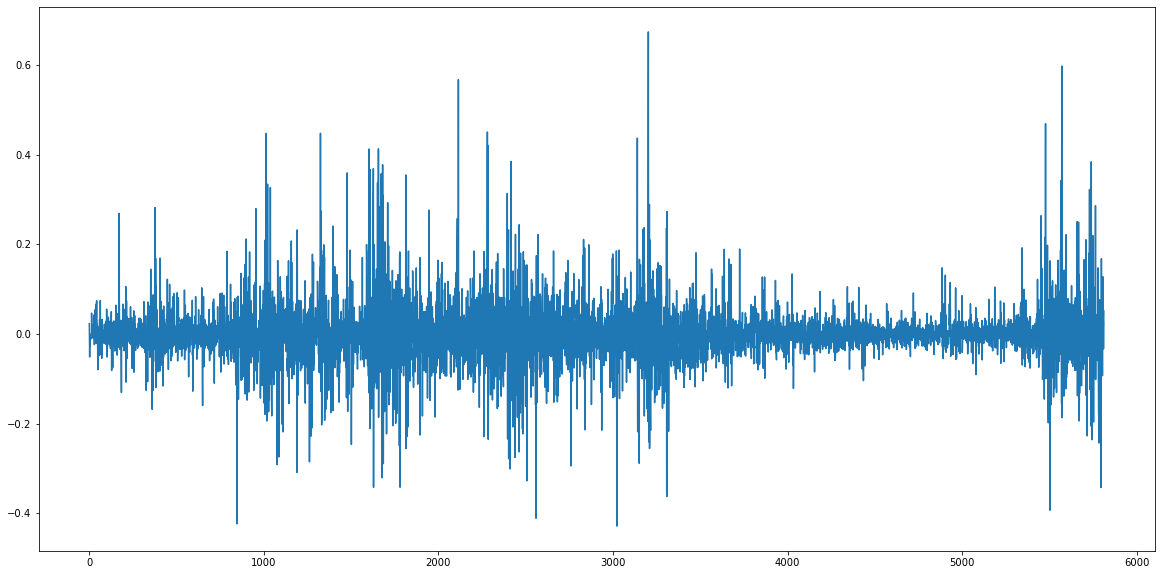

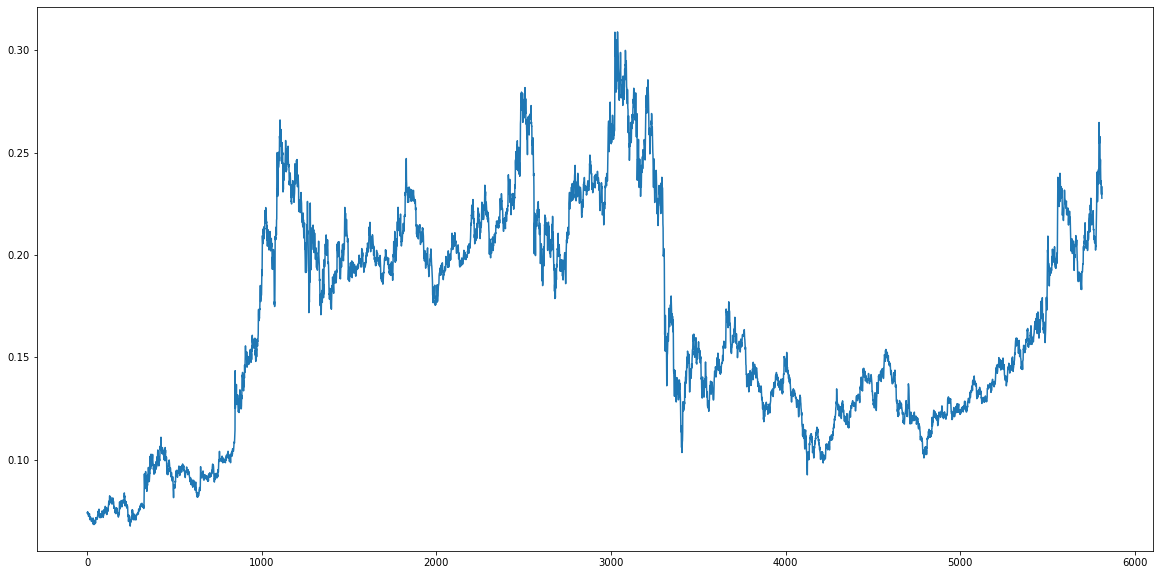

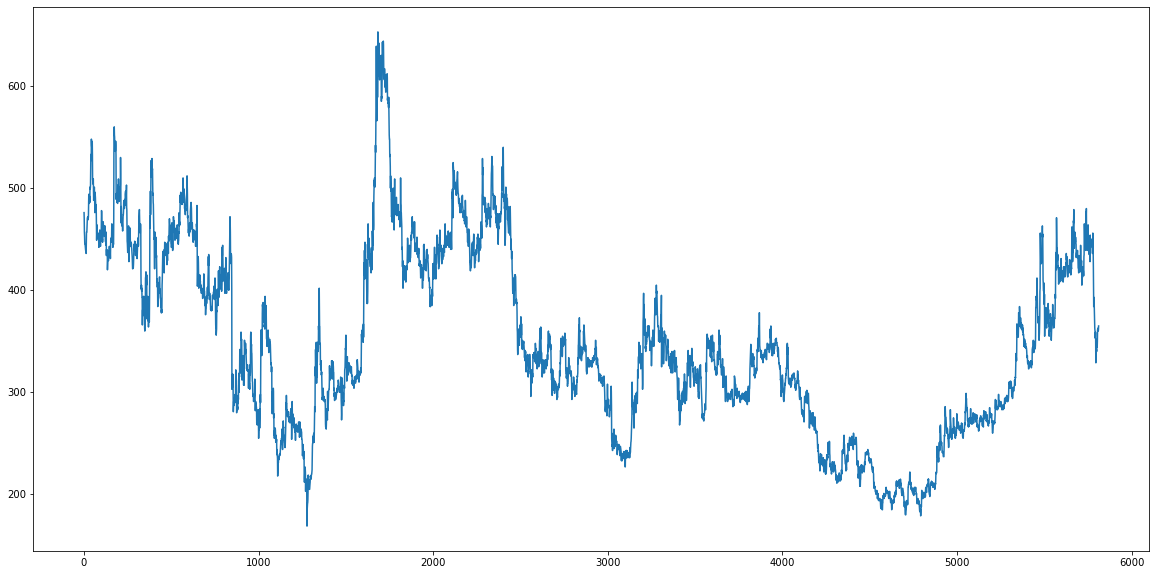

In [13]:
#Quanconnect
class KalmanFilter:
    def __init__(self):
        self.delta = 1e-4
        self.wt = self.delta / (1 - self.delta) * np.eye(2)
        self.vt = 1e-3
        self.theta = np.zeros(2)
        self.P = np.zeros((2, 2))
        self.R = None
        self.qty = 2000

    def update(self, price_one, price_two):
        # Create the observation matrix of the latest prices
        # of TLT and the intercept value (1.0)
        F = np.asarray([price_one, 1.0]).reshape((1, 2))
        y = price_two

        # The prior value of the states \theta_t is
        # distributed as a multivariate Gaussian with
        # mean a_t and variance-covariance R_t
        if self.R is not None:
            self.R = self.C + self.wt
        else:
            self.R = np.zeros((2, 2))

        # Calculate the Kalman Filter update
        # ----------------------------------
        # Calculate prediction of new observation
        # as well as forecast error of that prediction
        yhat = F.dot(self.theta)
        et = y - yhat

        # Q_t is the variance of the prediction of
        # observations and hence \sqrt{Q_t} is the
        # standard deviation of the predictions
        Qt = F.dot(self.R).dot(F.T) + self.vt
        sqrt_Qt = np.sqrt(Qt)

        # The posterior value of the states \theta_t is
        # distributed as a multivariate Gaussian with mean
        # m_t and variance-covariance C_t
        At = self.R.dot(F.T) / Qt
        self.theta = self.theta + At.flatten() * et
        self.C = self.R - At * F.dot(self.R)
        hedge_quantity = int(floor(self.qty*self.theta[0]))
        
        return et, sqrt_Qt, hedge_quantity

mkf = KalmanFilter()
series = []
series1 = []
series2 = []

for idx, row in c.iterrows():
    et, sqrt_Qt, hedge_quantity = mkf.update(row[symbol_list[0]], row[symbol_list[1]])
    series.append(et)
    series1.append(sqrt_Qt[0])
    series2.append(hedge_quantity)
    
# Plot the combined portfolio
plt.figure(figsize=(20,10))
plt.plot(series[10:])

# Plot sqrt_Qt
plt.figure(figsize=(20,10))
plt.plot(series1[10:])

# Plot hedge_quantity
plt.figure(figsize=(20,10))
plt.plot(series2[10:])

<ipython-input-17-b4e1a399d7ef>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.ax.set_yticklabels([str(p.date()) for p in prices[::plen//9].index])


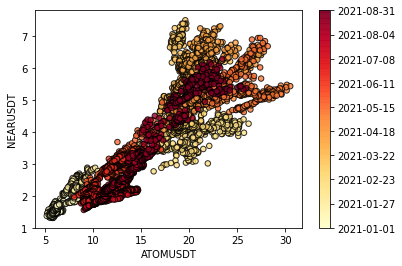

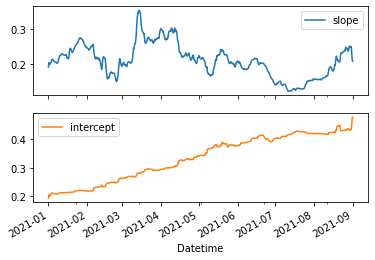

In [17]:
#Quantstart book

def draw_date_coloured_scatterplot(etfs, prices):
    """
    Create a scatterplot of the two ETF prices, which is
    coloured by the date of the price to indicate the
    changing relationship between the sets of prices
    """
    # Create a yellow-to-red colourmap where yellow indicates
    # early dates and red indicates later dates
    plen = len(prices)
    colour_map = plt.cm.get_cmap('YlOrRd')
    colours = np.linspace(0.1, 1, plen)
    # Create the scatterplot object
    scatterplot = plt.scatter(prices[etfs[0]], 
                              prices[etfs[1]],
                              s=30, 
                              c=colours, 
                              cmap=colour_map,
                              edgecolor='k', 
                              alpha=0.8)
    # Add a colour bar for the date colouring and set the
    # corresponding axis tick labels to equal string-formatted dates
    colourbar = plt.colorbar(scatterplot)
    colourbar.ax.set_yticklabels([str(p.date()) for p in prices[::plen//9].index])
    plt.xlabel(prices.columns[0])
    plt.ylabel(prices.columns[1])
    plt.show()

def calc_slope_intercept_kalman(etfs, prices):
    """
    Utilise the Kalman Filter from the PyKalman package
    to calculate the slope and intercept of the regressed
    ETF prices.
    """
    delta = 1e-5
    trans_cov = delta / (1 - delta) * np.eye(2)
    obs_mat = np.vstack([prices[etfs[0]], np.ones(prices[etfs[0]].shape)]).T[:, np.newaxis]
    kf = KalmanFilter(
        n_dim_obs=1,
        n_dim_state=2,
        initial_state_mean=np.zeros(2),
        initial_state_covariance=np.ones((2, 2)),
        transition_matrices=np.eye(2),
        observation_matrices=obs_mat,
        observation_covariance=1.0,
        transition_covariance=trans_cov)
    state_means, state_covs = kf.filter(prices[etfs[1]].values)
    return state_means, state_covs

def draw_slope_intercept_changes(prices, state_means):
    """
    Plot the slope and intercept changes from the
    Kalman Filter calculated values.
    """
    pd.DataFrame(
        dict(
            slope=state_means[:, 0],
            intercept=state_means[:, 1]), 
        index=prices.index).plot(subplots=True)
    plt.show()
    
if __name__ == "__main__":
    # Choose the ETF symbols to work with along with
    # start and end dates for the price histories
    etfs = [symbol_list[0], symbol_list[1]]
    draw_date_coloured_scatterplot(etfs, c)
    state_means, state_covs = calc_slope_intercept_kalman(etfs, c)
    draw_slope_intercept_changes(c, state_means)

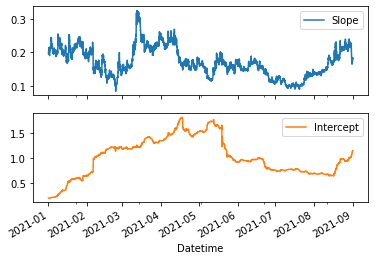

In [18]:
#letianzj
# ------------------------------------------- Kalman Filter --------------------------------------------------------#
state_cov_multiplier = np.power(0.01, 2)       # 0.1: spread_std=2.2, cov=16  ==> 0.01: 0.22, 0.16
observation_cov = 0.001
# observation matrix F is 2-dimensional, containing sym_a price and 1
# there are data.shape[0] observations
obs_mat_F = np.transpose(np.vstack([c[symbol_list[0]].values, np.ones(c.shape[0])])).reshape(-1, 1, 2)

kf = KalmanFilter(n_dim_obs=1,                                      # y is 1-dimensional
                  n_dim_state=2,                                    #  states (alpha, beta) is 2-dimensinal
                  initial_state_mean=np.ones(2),                    #  initial value of intercept and slope theta0|0
                  initial_state_covariance=np.ones((2, 2)),         # initial cov matrix between intercept and slope P0|0
                  transition_matrices=np.eye(2),                    # G, constant
                  observation_matrices=obs_mat_F,                   # F, depends on x
                  observation_covariance=observation_cov,                   # v_t, constant
                  transition_covariance= np.eye(2)*state_cov_multiplier)           # w_t, constant

state_means, state_covs = kf.filter(c[symbol_list[1]])                 # observes sym_b price
beta_kf = pd.DataFrame({'Slope': state_means[:, 0], 'Intercept': state_means[:, 1]}, index=c.index)
beta_kf.plot(subplots=True)
plt.show()